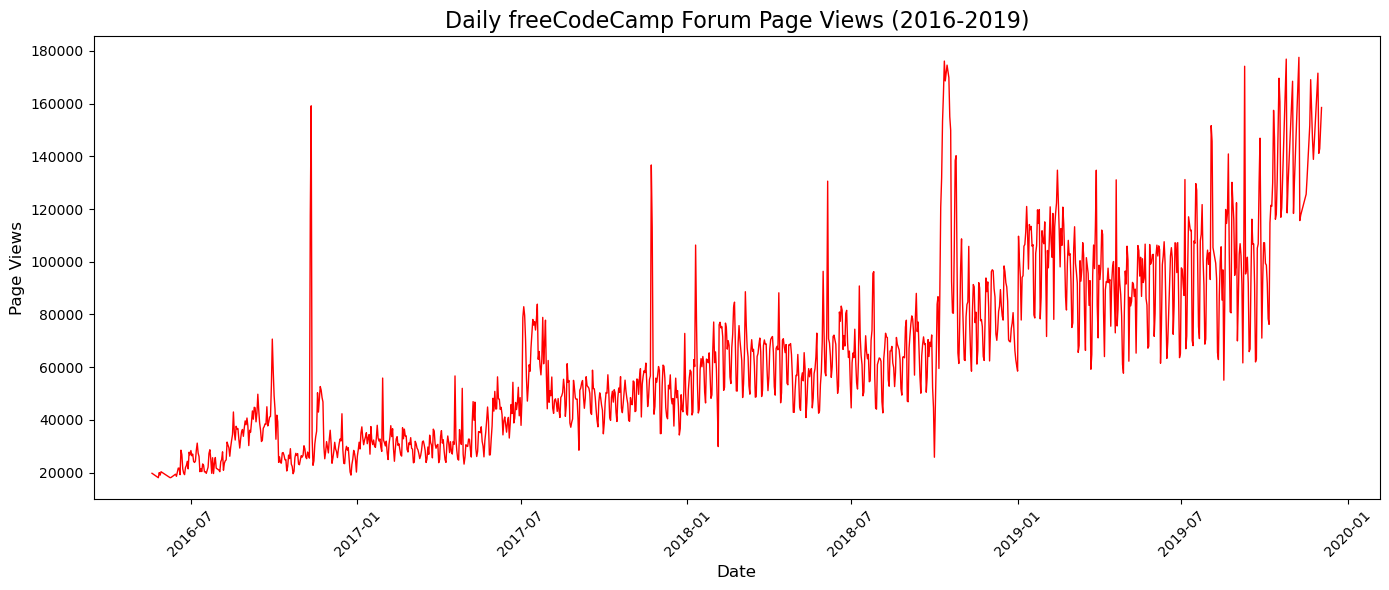

In [1]:
# 1. a line plot, similar to this

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the provided URL
url = "https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv"
df = pd.read_csv(url)

# Convert the 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'])

# Create new columns for year, month, and day
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.strftime('%B')
df['day'] = df['date'].dt.day

# Set the index to the 'date' column
df.set_index('date', inplace=True)

# Clean the data by filtering out the top 2.5% and bottom 2.5% of page views
lower_bound = df['value'].quantile(0.025)
upper_bound = df['value'].quantile(0.975)
df_cleaned = df[(df['value'] >= lower_bound) & (df['value'] <= upper_bound)]

# Create the line plot
plt.figure(figsize=(14, 6))
plt.plot(df_cleaned.index, df_cleaned['value'], color='red', linewidth=1)

# Adding title and labels
plt.title("Daily freeCodeCamp Forum Page Views (2016-2019)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Page Views", fontsize=12)

# Improve the appearance of the x-ticks
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

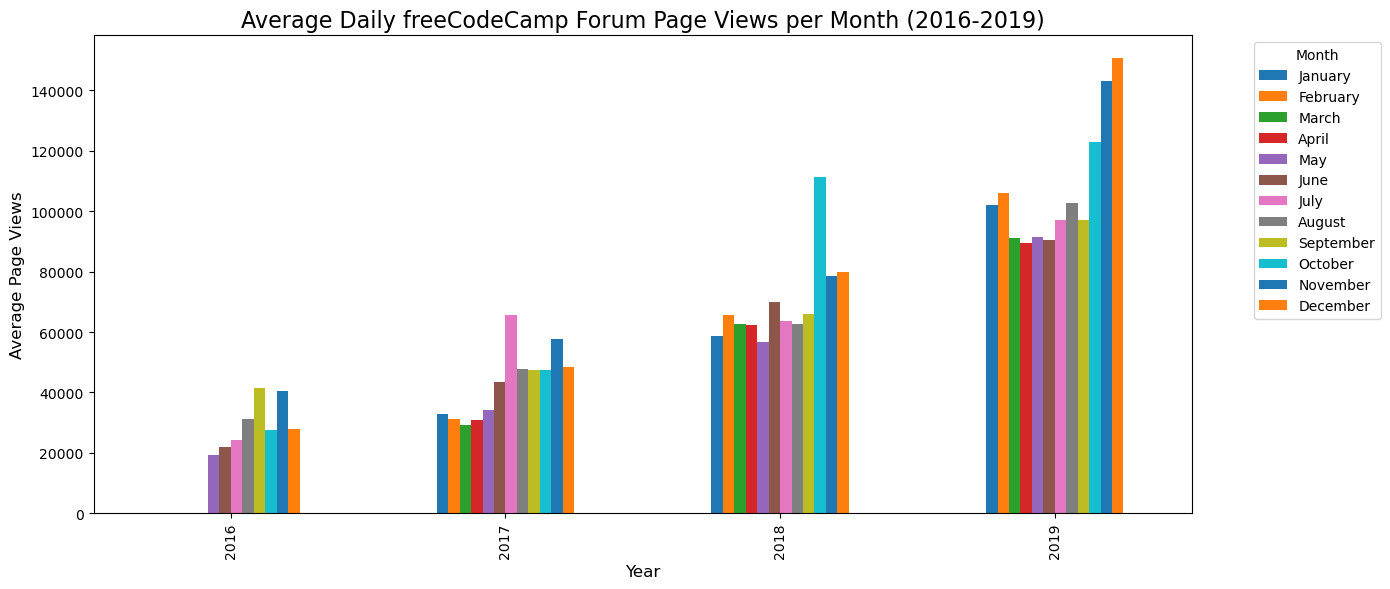

In [3]:
# 2. a bar chart similar to this

import pandas as pd
import matplotlib.pyplot as plt

# Load and clean the dataset
url = "https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv"
df = pd.read_csv(url)
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.strftime('%B')

# Remove the top 2.5% and bottom 2.5% of page views to remove outliers
lower_bound = df['value'].quantile(0.025)
upper_bound = df['value'].quantile(0.975)
df_cleaned = df[(df['value'] >= lower_bound) & (df['value'] <= upper_bound)]

# Create a pivot table with years as index, months as columns, and mean page views as values
pivot_table = df_cleaned.pivot_table(values='value', index='year', columns='month', aggfunc='mean')

# Reorder months to be in chronological order
months_order = ["January", "February", "March", "April", "May", "June",
                "July", "August", "September", "October", "November", "December"]
pivot_table = pivot_table[months_order]

# Plot the bar chart
plt.figure(figsize=(12, 6))
pivot_table.plot(kind='bar', figsize=(14, 6))

# Adding title and labels
plt.title("Average Daily freeCodeCamp Forum Page Views per Month (2016-2019)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Page Views", fontsize=12)
plt.legend(title="Month", bbox_to_anchor=(1.05, 1), loc='upper left')

# Improve layout and display the plot
plt.tight_layout()
plt.show()


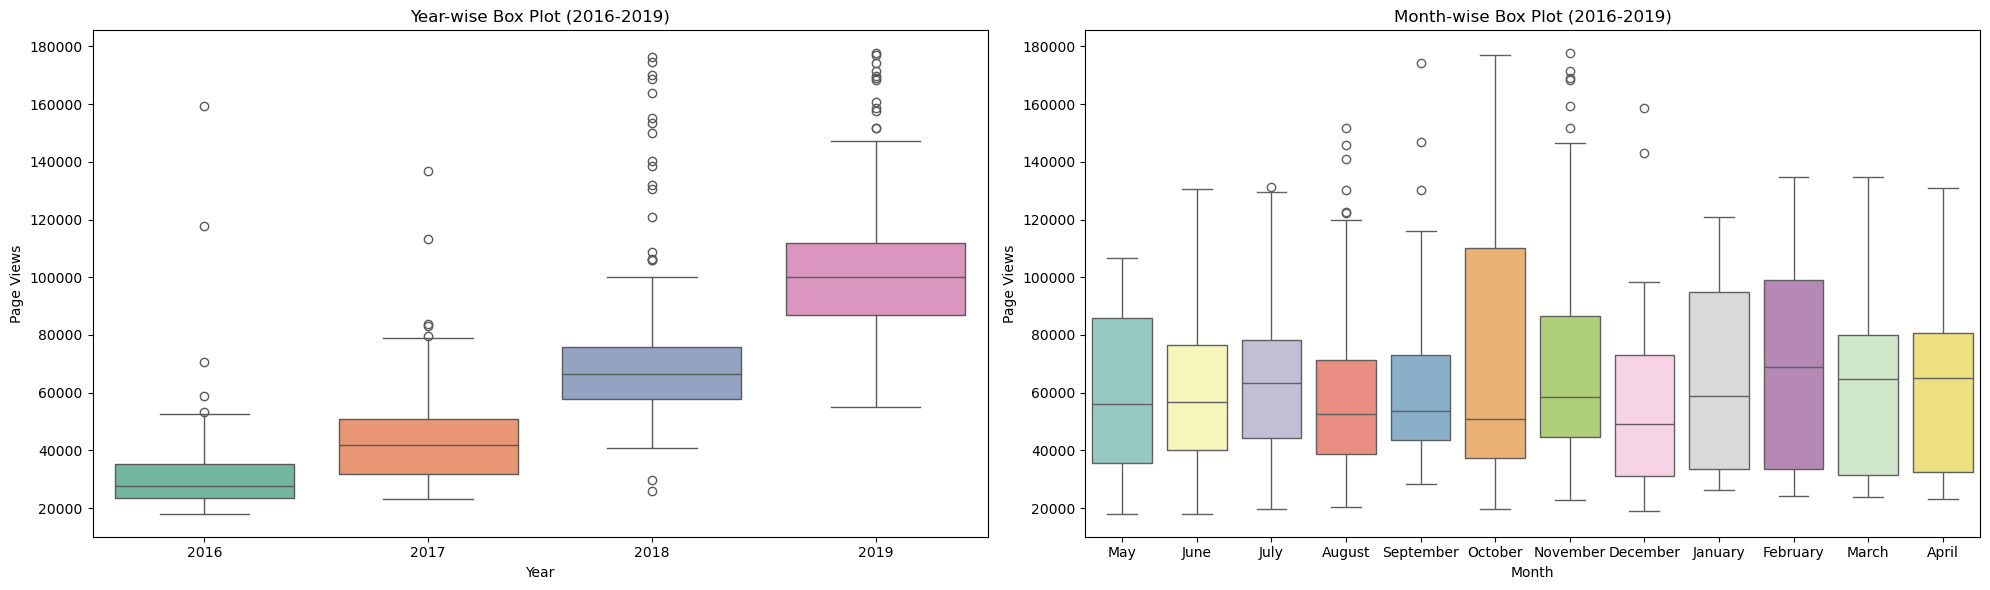

In [13]:
# 3. a set of box plots similar to this

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean the dataset
url = "https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv"
df = pd.read_csv(url)
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.strftime('%B')

# Remove the top 2.5% and bottom 2.5% of page views to remove outliers
lower_bound = df['value'].quantile(0.025)
upper_bound = df['value'].quantile(0.975)
df_cleaned = df[(df['value'] >= lower_bound) & (df['value'] <= upper_bound)].copy()  # Ensure we're working with a copy

# Reorder months to be in chronological order
months_order = ["January", "February", "March", "April", "May", "June",
                "July", "August", "September", "October", "November", "December"]
df_cleaned.loc[:, 'month'] = pd.Categorical(df_cleaned['month'], categories=months_order, ordered=True)

# Use seaborn color palette for different colors
colors = sns.color_palette("Set3", 12)  # 12 different colors for months

plt.figure(figsize=(20, 6))

# Box plot for year-wise distribution
plt.subplot(1, 2, 1)
sns.boxplot(x='year', y='value', data=df_cleaned, palette="Set2", hue='year', legend=False)
plt.title("Year-wise Box Plot (2016-2019)")
plt.xlabel("Year")
plt.ylabel("Page Views")

# Box plot for month-wise distribution with different colors
plt.subplot(1, 2, 2)
sns.boxplot(x='month', y='value', data=df_cleaned, palette=colors, hue='month', legend=False)
plt.title("Month-wise Box Plot (2016-2019)")
plt.xlabel("Month")
plt.ylabel("Page Views")

# Improve layout and display the plot
plt.tight_layout()
plt.show()



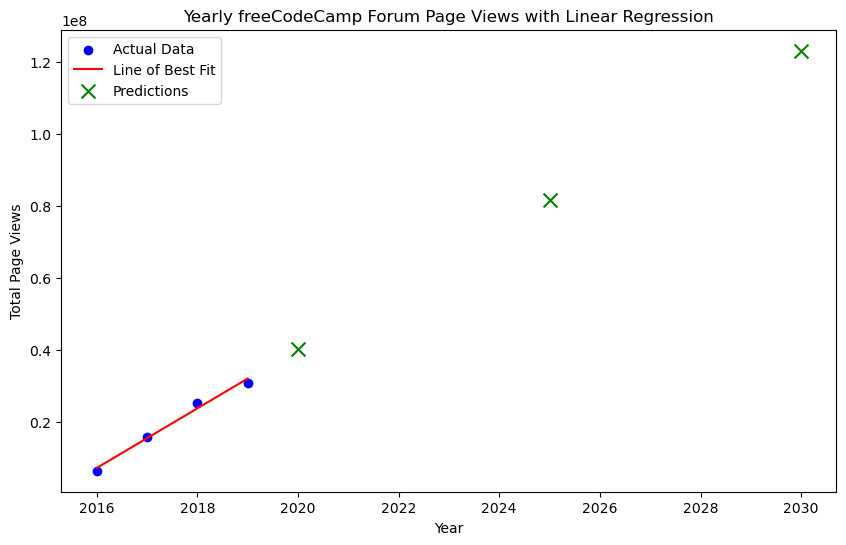

Predicted page views for the year 2020: 40259688
Predicted page views for the year 2025: 81744832
Predicted page views for the year 2030: 123229977


In [15]:
#

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Load and clean the dataset
url = "https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv"
df = pd.read_csv(url)
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# Remove the top 2.5% and bottom 2.5% of page views to remove outliers
lower_bound = df['value'].quantile(0.025)
upper_bound = df['value'].quantile(0.975)
df_cleaned = df[(df['value'] >= lower_bound) & (df['value'] <= upper_bound)].copy()

# Aggregate data by year
df_yearly = df_cleaned.groupby('year')['value'].sum().reset_index()

# Prepare the data for linear regression
X = df_yearly['year'].values.reshape(-1, 1)  # Independent variable: Year
y = df_yearly['value'].values  # Dependent variable: Total page views

# Perform linear regression
model = LinearRegression()
model.fit(X, y)

# Predict future page views for the years 2020, 2025, and 2030
future_years = np.array([2020, 2025, 2030]).reshape(-1, 1)
predictions = model.predict(future_years)

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')  # Plot the actual data points
plt.plot(X, model.predict(X), color='red', label='Line of Best Fit')  # Regression line

# Plot the predictions
plt.scatter(future_years, predictions, color='green', marker='x', s=100, label='Predictions')

# Adding title and labels
plt.title("Yearly freeCodeCamp Forum Page Views with Linear Regression")
plt.xlabel("Year")
plt.ylabel("Total Page Views")
plt.legend()

# Display the plot
plt.show()

# Print predictions for 2020, 2025, and 2030
for year, pred in zip(future_years.flatten(), predictions):
    print(f"Predicted page views for the year {year}: {int(pred)}")
